In [98]:
import tensorflow as tf
from tensorflow import keras
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [99]:
x_train.shape


(60000, 28, 28)

In [100]:
x_test.shape


(10000, 28, 28)

In [101]:
y_train.shape


(60000,)

In [102]:
y_test.shape

(10000,)

In [103]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
y_train = y_train.reshape((60000, 1,1,1))
y_test = y_test.reshape((10000, 1,1,1))

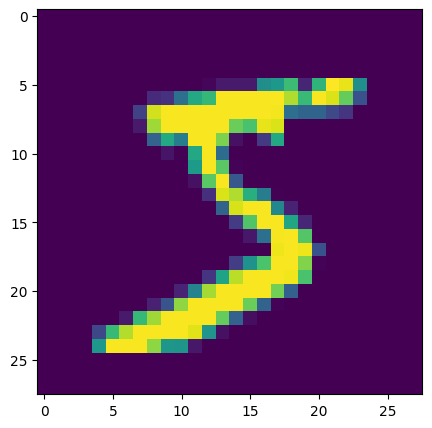

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])

In [105]:
y_train[0]

array([[[5]]], dtype=uint8)

In [106]:
x_train = tf.keras.layers.ZeroPadding2D(padding=2)(x_train)

In [107]:
x_train.shape

TensorShape([60000, 32, 32, 1])

<h1>모델 구성

In [108]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=5,strides=1,activation="relu",padding="valid", input_shape=[32,32,1]))


In [109]:
 #(60000, 28, 28, 6)
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=5,strides=1,activation="relu",padding="valid"))


ValueError: Input 0 of layer "conv2d_13" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 784)

In [ ]:
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2))
#(60000, 14, 14, 6)

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=5,strides=1,activation="tanh",padding="valid"))
#(60000, 10, 10, 16)

In [ ]:
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2))
#(60000, 5, 5, 16)

In [ ]:
model.add(tf.keras.layers.Flatten())
#(60000, 1, 1, 120)

In [ ]:
model.add(tf.keras.layers.Dense(84,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="softmax"))

In [ ]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 84)               

In [ ]:
model.fit(x_train,y_train,validation_data=(x_train,y_train),epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\cpfld\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\cpfld\AppData\Local\Temp\ipykernel_12992\811317114.py", line 1, in <module>
      model.fit(x_train,y_train,validation_data=(x_train,y_train),epochs=10)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 1).  Label values: 0 1 4 5 3 4 7 9 6 0 0 4 4 1 6 0 2 9 0 1 5 6 4 9 3 7 0 7 9 1 2 9
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_507227]

In [ ]:
y=model.predict_classes(x_train)
print(y.shape,x_train.shape)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
print(y.shape,y_train.shape)

(60000, 1, 1, 1) (60000, 1, 1, 1)


In [ ]:
print(y[0])

[[[1.]]]
